# Wine Analysis Project
## Methods
 - Ordinary Least Squares (OLS) *
 - Ridge Regression (RR)
 - Lasso Regression

## Preface
<b>  I am Ethan Wang and this is my first IEOR class.  This is my first time using sklearn and matplotlib, so I had quite a difficult time adapting to all the functions within sklearn.  I spent an unnecessary amount of time manually coding out the entire Leave k-out cross validation algorithm without realizing their are functions that can abstract away those algorithms.  While I had fun coding, it was difficult for me to design and analyze an entire project on the premise of unfamiliar territory. I did my best to outline every step I took in this process throughout the coding procedures, and I hope readers are able to see the detail and effort I put into this work. Thank you </b>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import lstsq

In [2]:
df = pd.read_excel (r'C:\IEOR165project\winequality-red.xlsx')
print(df)

     "fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                       
1      7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                       
2     7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                       
3     11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                       
4      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                      

In [3]:
#reorganizing data

data = pd.read_excel (r'C:\IEOR165project\winequality-red.xlsx')

#new_data should consist of rows of each wine based on different features

new_data = data['"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';')

#use colnames to keep track

colnames = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

#testing of new_data
print(type(new_data.iloc[0][11]))

newlist = new_data.iloc[0]
print(newlist)
alterlist = newlist[-3:]
print(alterlist)
alterlist[0] = 1000
print(alterlist)
print(newlist)


<class 'str'>
['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5']
['0.56', '9.4', '5']
[1000, '9.4', '5']
['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5']


## OLS Computation

In [87]:
featurelist = []
nocoeffeatures = []
qualitylist = []
alltgt = []

# create matrix for features
for i in range(len(new_data)):
    addlist = new_data[i][:11]
    floatlist = [float(x) for x in addlist]
    nocoeffeatures.append(floatlist)
    coefflist = [1]
    coefflist.extend(floatlist)
    featurelist.append(coefflist)
    
# create matrix for quality column 
for j in range(len(new_data)):
    addlist = [float(new_data[j][-1])]
    qualitylist.append(addlist)

for k in range(len(new_data)):
    addlist = new_data[k]
    floatlist = [float(y) for y in addlist]
    alltgt.append(floatlist)
    

    
xmatrix = np.array(featurelist)
ymatrix = np.array(qualitylist)

#OLS computation
B = lstsq(xmatrix, ymatrix)
print(xmatrix.shape)
print(ymatrix.shape)
print(B[0])
print(B[1])

# testing
# print(max_quality)
# print(featurelist)
# print(qualitylist)
# print(xmatrix.shape)
# print(ymatrix.shape)

#write into excel 
df1 = pd.DataFrame(B[0], index=["B0", "fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"], columns=["coefficients"])
df1.to_excel("coeff_OLS.xlsx")
df2 = pd.DataFrame(alltgt, columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df2.to_excel("winequality-final.xlsx")

(1599, 12)
(1599, 1)
[[ 2.19652084e+01]
 [ 2.49905527e-02]
 [-1.08359026e+00]
 [-1.82563948e-01]
 [ 1.63312698e-02]
 [-1.87422516e+00]
 [ 4.36133331e-03]
 [-3.26457970e-03]
 [-1.78811638e+01]
 [-4.13653144e-01]
 [ 9.16334413e-01]
 [ 2.76197699e-01]]
[666.41070039]


## Measuring Error from OLS

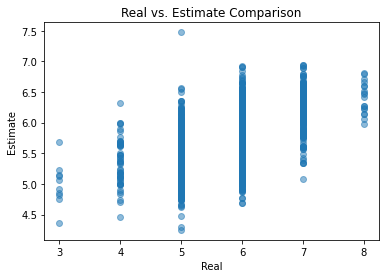

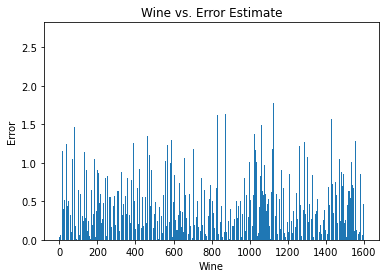

In [5]:
params = B[0]
estimatelist = []
realvalues = qualitylist
errors = []
for i in range(len(xmatrix)):
    estimate = np.matmul(xmatrix[i], params)
    estimatelist.extend(estimate)
    errors.extend(abs(estimate - qualitylist[i]))

    
x = realvalues
y = estimatelist


plt.scatter(x, y, alpha=0.5)
plt.title('Real vs. Estimate Comparison')
plt.xlabel('Real')
plt.ylabel('Estimate')
plt.show()


Wine = [x for x in range(1, 1600)]
Error_Estimate = errors

plt.bar(Wine, Error_Estimate)
plt.title('Wine vs. Error Estimate')
plt.xlabel('Wine')
plt.ylabel('Error')
plt.show()
    
    

## Method and Observation (OLS)
<b> Through this method, I set up matrices for the features, excluding quality, and the one dimensional matrix for quality scores.  Using these two matrices, I was able to use the lstsq function from the scipy library to compute the least squared estimate of the features correlating to wine quality.  Although the total residual value (666.41) is quite high, but considering that there are 1599 samples of wine, having a total error estimate of 666.41 is not too bad.  This meant that on average, there's a 0.41 off error using the estimated parameters in estimating wine quality with every row of data.  With a quality scale ranging from 3 to 8, this is considered a decent estimate. </b>

# Ridge Regression Computation
 - Leave k-Out Cross-Validation

In [57]:
from sklearn import linear_model
from sklearn import preprocessing
from statistics import mean

In [58]:
# modifying to reflect sklearn computing framework
# qualitylist = quality of all 1599 wines in an int array
# modxmatrix = feature matrix without additional 1 for B0 coefficient
# nocoeffeatures = list of lists that contain feature data without the B0 coefficient 
modxmatrix = np.array(nocoeffeatures)

scale = preprocessing.scale(nocoeffeatures)
# print(scale)

print(mean([1, 2, 3, 4, 5]))

reg = linear_model.Ridge(alpha=0)
reg.fit(modxmatrix, ymatrix)
modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)
print(modcoeffs)
# print(reg.intercept_)
np.matmul(modcoeffs, np.array(featurelist[4]))

3
[ 2.19652084e+01  2.49905527e-02 -1.08359026e+00 -1.82563948e-01
  1.63312698e-02 -1.87422516e+00  4.36133331e-03 -3.26457970e-03
 -1.78811638e+01 -4.13653144e-01  9.16334413e-01  2.76197699e-01]


5.032850452145844

<b> In the following cell above, I have tested the ridge regression model and made sure the computation steps were correct.  When I set alpha equal to 0, the coefficients that were computed matched my OLS computation exactly, which demonstrated that the steps were correct. </b>

In [114]:
# using tuning parameters from 1 to 200 inclusive
tuningps = [i for i in range(1, 200)]

# function for calculating the best tuning parameter
errors = [0 for i in tuningps]    

# we will use 10 repetitions
for i in range(10):
    sample1 = np.random.choice(len(nocoeffeatures), len(new_data) // 2, replace=False)
    for j in tuningps:
        # doing ridge on sample1
        rxlist = []
        rylist = []
        
        # creating matrices
        for k in sample1:
            rxlist.append(nocoeffeatures[k])
            rylist.append(qualitylist[k])
        rxmatrix = np.array(rxlist)
        rymatrix = np.array(rylist)
        
        # performing ridge regression computation
        reg = linear_model.Ridge(alpha=j)
        reg.fit(rxmatrix, rymatrix)
        modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)
        
        # computing total error for each tuning parameter
        for x in range(len(new_data)):
            if x not in sample1:
                estimate = np.matmul(modcoeffs, np.array(featurelist[x]))
                pointerror = (estimate - qualitylist[x])**2
                errindex = tuningps.index(j)
                errors[errindex] += pointerror
                
# finding the best tuning parameter and printing it out

# least_error_total = min(errors)
tuningindex = errors.index(min(errors))
print(tuningps[tuningindex])
print(min(errors))


        
            
            

1
[3472.19920208]


## Analysis
<b> In the above cell, I've designed the Leave k-out cross-validation algorithm to perform the computation of trying to find the correct and best tuning parameter to help perform our analysis.  For every iteration of distinct tuning parameter, of which I listed from 1 to 200, I randomly selected half of the 1599 datapoints to perform ridge regression through the sklearn library.  Then, in order to compute the quality of the estimation, I used the remaining half of the data to compute the total error using the computed parameters to estimate the quality values.  Interestingly enough, the best tuning parameter turned out to be the lowest one.  I will attempt to graph scattet plots and line plots to investigate the relationship between tuning parameters and estimation error further in the following cell. </b>

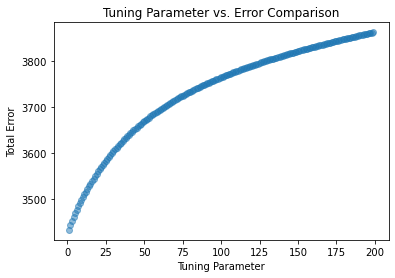

In [74]:
# for scatter plot

x = tuningps
y = []
for i in range(len(errors)):
    y.append(errors[i][0])
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

## Analysis
<b> As you can see from this graph, increasing the tuning parameter consistently increases the total error of the estimated parameter.  Before we make the conclusion that 1 is the best tuning parameter, let's try significantly larger tuning parameters, and see how that affects the total error computation. If we don't see improvement in the error estimation, we may try standardizing the independent variables before computing ridge regression. </b>

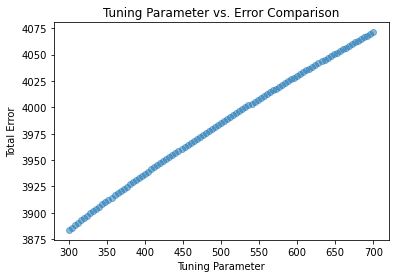

In [75]:
# using tuning parameters from 300 to 700 by steps of 4, so there are 100 total tuning parameters
tuningps = [i for i in range(300, 701, 4)]

# function for calculating the best tuning parameter
errors = [0 for i in tuningps]    

# we will use 10 repetitions
for i in range(10):
    sample1 = np.random.choice(len(nocoeffeatures), len(new_data) // 2, replace=False)
    for j in tuningps:
        # doing ridge on sample1
        rxlist = []
        rylist = []
        
        # creating matrices
        for k in sample1:
            rxlist.append(nocoeffeatures[k])
            rylist.append(qualitylist[k])
        rxmatrix = np.array(rxlist)
        rymatrix = np.array(rylist)
        
        # performing ridge regression computation
        reg = linear_model.Ridge(alpha=j)
        reg.fit(rxmatrix, rymatrix)
        modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)
        
        # computing total error for each tuning parameter
        for x in range(len(new_data)):
            if x not in sample1:
                estimate = np.matmul(modcoeffs, np.array(featurelist[x]))
                pointerror = (estimate - qualitylist[x])**2
                errindex = tuningps.index(j)
                errors[errindex] += pointerror
                
# scatter plot graphing
x = tuningps
y = []
for i in range(len(errors)):
    y.append(errors[i][0])
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

## Analysis
<b> Now, it is clear to us that the higher the tuning parameter, the larger the total error will be.  So, we need to consider standardizing the variables to perhaps find better parameters.  One justification as to why standardizing the independent variables would be helpful is because the features related to the wine are based off from different scales.  For example, pH is on a scale from 0-14, while density does not seem to go below 0.90 or above 1.  So, to treat each feature fairly, we should standardize them so that each variable is subject relatively to the same scale, so the computation during ridge regression can be more accurate.  Once we standardize them, however, we have to make sure to undo the standardization once we calculate our parameters, to reveal the true parameters based on the original scale. </b>

In [105]:
# figure out undoing of standardization
# featurelist  = the list of list of features (independent variables) and 1 from B0 coefficient
# nocoeffeatures = list of list of just features (indpendent variables) and no B0 coefficient
# qualitylist = the list of strictly just quality of wine value
# alltgt = list of lists of features and final wine quality value

from sklearn import preprocessing

scale = preprocessing.scale(alltgt)

featuredict = {"fixed acidity" : 0,"volatile acidity" : 0,"citric acid" : 0,"residual sugar" : 0,
               "chlorides" : 0,"free sulfur dioxide" : 0,"total sulfur dioxide" : 0,"density" : 0,
               "pH" : 0,"sulphates" : 0,"alcohol" : 0,"quality" : 0}

for i in alltgt:
    featuredict.update({"fixed acidity": featuredict.get("fixed acidity") + i[0]})
    featuredict.update({"volatile acidity": featuredict.get("volatile acidity") + i[1]})
    featuredict.update({"citric acid": featuredict.get("citric acid") + i[2]})
    featuredict.update({"residual sugar": featuredict.get("residual sugar") + i[3]})
    featuredict.update({"chlorides": featuredict.get("chlorides") + i[4]})
    featuredict.update({"free sulfur dioxide": featuredict.get("free sulfur dioxide") + i[5]})
    featuredict.update({"total sulfur dioxide": featuredict.get("total sulfur dioxide") + i[6]})
    featuredict.update({"density": featuredict.get("density") + i[7]})
    featuredict.update({"pH": featuredict.get("pH") + i[8]})
    featuredict.update({"sulphates": featuredict.get("sulphates") + i[9]})
    featuredict.update({"alcohol": featuredict.get("alcohol") + i[10]})
    featuredict.update({"quality": featuredict.get("quality") + i[11]})
    
winenumber = len(new_data)
    
# calculating averages
featuredict.update({"fixed acidity": featuredict.get("fixed acidity") / winenumber})
featuredict.update({"volatile acidity": featuredict.get("volatile acidity") / winenumber})
featuredict.update({"citric acid": featuredict.get("citric acid") / winenumber})
featuredict.update({"residual sugar": featuredict.get("residual sugar") / winenumber})
featuredict.update({"chlorides": featuredict.get("chlorides") / winenumber})
featuredict.update({"free sulfur dioxide": featuredict.get("free sulfur dioxide") / winenumber})
featuredict.update({"total sulfur dioxide": featuredict.get("total sulfur dioxide") / winenumber})
featuredict.update({"density": featuredict.get("density") / winenumber})
featuredict.update({"pH": featuredict.get("pH") / winenumber})
featuredict.update({"sulphates": featuredict.get("sulphates") / winenumber})
featuredict.update({"alcohol": featuredict.get("alcohol") / winenumber})
featuredict.update({"quality": featuredict.get("quality") / winenumber})

qualitymean = featuredict.get("quality")

print(featuredict)

# calculating std
featuredict.update({"fixed acidity": (alltgt[0][0] - featuredict.get("fixed acidity")) / scale[0][0]})
featuredict.update({"volatile acidity": (alltgt[0][1] - featuredict.get("volatile acidity")) / scale[0][1]})
featuredict.update({"citric acid": (alltgt[0][2] - featuredict.get("citric acid")) / scale[0][2]})
featuredict.update({"residual sugar": (alltgt[0][3] - featuredict.get("residual sugar")) / scale[0][3]})
featuredict.update({"chlorides": (alltgt[0][4] - featuredict.get("chlorides")) / scale[0][4]})
featuredict.update({"free sulfur dioxide": (alltgt[0][5] - featuredict.get("free sulfur dioxide")) / scale[0][5]})
featuredict.update({"total sulfur dioxide": (alltgt[0][6] - featuredict.get("total sulfur dioxide")) / scale[0][6]})
featuredict.update({"density": (alltgt[0][7] - featuredict.get("density")) / scale[0][7]})
featuredict.update({"pH": (alltgt[0][8] - featuredict.get("pH")) / scale[0][8]})
featuredict.update({"sulphates": (alltgt[0][9] - featuredict.get("sulphates")) / scale[0][9]})
featuredict.update({"alcohol": (alltgt[0][10] - featuredict.get("alcohol")) / scale[0][10]})
featuredict.update({"quality": (alltgt[0][11] - featuredict.get("quality")) / scale[0][11]})

qualitystd = featuredict.get("quality")

print(featuredict)
    




{'fixed acidity': 8.319637273295838, 'volatile acidity': 0.5278205128205131, 'citric acid': 0.2709756097560964, 'residual sugar': 2.5388055034396517, 'chlorides': 0.08746654158849257, 'free sulfur dioxide': 15.874921826141339, 'total sulfur dioxide': 46.46779237023139, 'density': 0.9967466791744831, 'pH': 3.311113195747343, 'sulphates': 0.6581488430268921, 'alcohol': 10.422983114446502, 'quality': 5.6360225140712945}
{'fixed acidity': 1.7405518001102784, 'volatile acidity': 0.17900370424468975, 'citric acid': 0.1947402144523329, 'residual sugar': 1.4094871124880504, 'chlorides': 0.04705058260331576, 'free sulfur dioxide': 10.456885614930723, 'total sulfur dioxide': 32.88503665178367, 'density': 0.0018867437008323919, 'pH': 0.15433818141060152, 'sulphates': 0.16945396724179526, 'alcohol': 1.0653343003437463, 'quality': 0.8073168769639486}


## Analysis (Mean and Std)
<b> In the above cell computation,  I tried to compute the mean and standard deviations for each of the independent and dependent variables upon scaling the features and qualities before performing ridge regression.  This is so that once we find the parameters based on the scaled values, we can rescale back to its original values to see exactly if our ridge regression has improved the prediction measure of quality through standardization. </b>

In [101]:
# alltgt = features + quality
# scale = scaled version of features + quality

# scaling
scale = preprocessing.scale(alltgt)

# scalefeat_withb0 = scaled features with b0 coefficient
# scalefeat_nob0 = scaled features without b0 coefficient added
# scalequality = the scaled quality scores of all the wine

scalefeat_withb0 = []
scalefeat_nob0 = []
scalequality = []

for i in range(len(scale)):
    addone = [1]
    addone.extend(scale[i][:11])
    scalefeat_withb0.append(addone)
    scalefeat_nob0.append(scale[i][:11])
    scalequality.append(scale[i][11])
    
print(scalefeat_withb0[0])

# tuning parameters from 1 to 200 by 2 steps
tuningps = [i for i in range(1, 200)]

# function for calculating the best tuning parameter
errors = [0 for i in tuningps]    

# we will use 10 repetitions
for i in range(10):
    sample1 = np.random.choice(len(scale), len(new_data) // 2, replace=False)
    for j in tuningps:
        # doing ridge on sample1
        rxlist = []
        rylist = []
        
        # creating matrices
        for k in sample1:
            rxlist.append(scale[k][:11])
            rylist.append(scale[k][11])
        rxmatrix = np.array(rxlist)
        rymatrix = np.array(rylist)
        
        # performing ridge regression computation
        reg = linear_model.Ridge(alpha=j)
        reg.fit(rxmatrix, rymatrix)
        modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)
        
        # computing total error for each tuning parameter
        for x in range(len(new_data)):
            if x not in sample1:
                estimate = np.matmul(modcoeffs, np.array(scalefeat_withb0[x]))
                pointerror = (estimate - scale[x][11])**2
                errindex = tuningps.index(j)
                errors[errindex] += pointerror

print(errors)
print(tuningps[errors.index(min(errors))])
    

[1, -0.5283596117263334, 0.961876671245448, -1.3914722776605748, -0.4532184067380521, -0.24370668659232497, -0.4661925171277333, -0.37913268889591295, 0.5582744625315024, 1.2886429167098845, -0.5792065221278808, -0.9602461068947287]
[5203.945466004767, 5203.054298953281, 5202.192651583086, 5201.359098198625, 5200.552329980326, 5199.77114257382, 5199.0144252340415, 5198.281151303581, 5197.570369838721, 5196.881198225495, 5196.212815653239, 5195.564457331192, 5194.935409352499, 5194.3250041221345, 5193.732616278474, 5193.157659047098, 5192.59958097466, 5192.057862997157, 5191.532015803312, 5191.0215774590915, 5190.526111263185, 5190.045203808066, 5189.578463223349, 5189.125517582256, 5188.686013452957, 5188.259614580203, 5187.846000683108, 5187.444866357518, 5187.055920072375, 5186.678883250452, 5186.313489425556, 5185.959483468203, 5185.616620874125, 5185.284667108497, 5184.963397002102, 5184.652594193193, 5184.352050612221, 5184.0615660046105, 5183.7809474890455, 5183.510009147359, 518

## Analysis
<b> As you can see, there seems be to be a new tuning parameter that's the best now that we have standardized all our data, giving each feature equal weight into its influence on the quality of the wine, as well as allowing collinearity to be taken into account. Collinearity can be possible, with different amounts of citric acid in each wine could also mean it would correlate strongly with the fixed or volatile acidity.  However, these chemical conjectures are out of my field of expertise. In the following cell, we are going to create a plot to illustrate the estimation error against the tuning parameters from 1 to 200. </b>

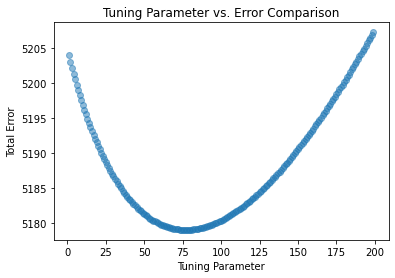

In [102]:
x = tuningps
y = []
for i in range(len(errors)):
    y.append(errors[i])
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

## Analysis
<b>  This is very interesting.  The lowest error point in the above visualization with standardized is clear at around 77. Although the error is above 5000 and non-standardized ridge regression demonstrated an error around 3400, but the standard deviation for quality is 0.8 while it is 1 for standardized, which may explain a higher error rate. Our next step is to rescale every estimate we get from the standardized parameters to the scale wine quality is originally on and then graph their respective error estimates through the same algorithm. </b>

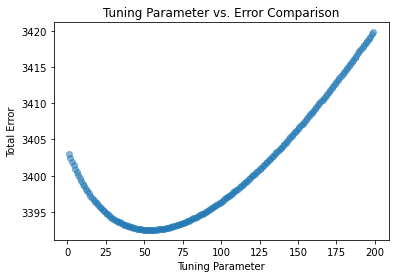

In [115]:
# tuning parameters from 1 to 200 by 2 steps
tuningps = [i for i in range(1, 200)]

# function for calculating the best tuning parameter
errors = [0 for i in tuningps]    

# we will use 10 repetitions
for i in range(10):
    sample1 = np.random.choice(len(scale), len(new_data) // 2, replace=False)
    for j in tuningps:
        # doing ridge on sample1
        rxlist = []
        rylist = []
        
        # creating matrices
        for k in sample1:
            rxlist.append(scale[k][:11])
            rylist.append(scale[k][11])
        rxmatrix = np.array(rxlist)
        rymatrix = np.array(rylist)
        
        # performing ridge regression computation
        reg = linear_model.Ridge(alpha=j)
        reg.fit(rxmatrix, rymatrix)
        modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)
        
        # computing total error for each tuning parameter
        for x in range(len(new_data)):
            if x not in sample1:
                estimate = np.matmul(modcoeffs, np.array(scalefeat_withb0[x]))
                pointerror = ((qualitymean + estimate * qualitystd) - qualitylist[x])**2 # key step in rescaling back to original quality scale
                errindex = tuningps.index(j)
                errors[errindex] += pointerror
                
                
x = tuningps
y = []
for i in range(len(errors)):
    y.append(errors[i])
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()


In [116]:
print(min(errors))
print(tuningps[errors.index(min(errors))])

[3392.5107028]
54


## Analysis 
<b> With this new rescaling back to the original quality score, we can see the shifted tuning parameter to 54 instead of 77. This is most likely due to the rescaling of the final estimation value in the end. Let's calculate the error of just the best tuning parameter given from rescaling back to the original quality scale, and then see how this compares to OLS. </b>

In [187]:
# figure out undoing of standardization
# featurelist  = the list of list of features (independent variables) and 1 from B0 coefficient
# nocoeffeatures = list of list of just features (indpendent variables) and no B0 coefficient
# qualitylist = the list of strictly just quality of wine value
# alltgt = list of lists of features and final wine quality value

# creating matrices for ridge
rxmatrix = np.array(scalefeat_nob0)
rymatrix = np.array(scalequality)

# performing ridge regression computation
reg = linear_model.Ridge(alpha=54)
reg.fit(rxmatrix, rymatrix)
modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)

best_error = 0

# computing total error for each tuning parameter
for x in range(len(new_data)):
    estimate = np.matmul(modcoeffs, np.array(scalefeat_withb0[x]))
    pointerror = ((qualitymean + estimate * qualitystd) - qualitylist[x])**2
    best_error += pointerror
        
print(best_error)
print(modcoeffs)
print((qualitymean + np.matmul(modcoeffs, np.array(featurelist[0])) *qualitystd))

[666.80635897]
[ 2.30487767e-14  6.41045370e-02 -2.29776034e-01 -2.74854878e-02
  3.25479240e-02 -1.06717441e-01  5.05054128e-02 -1.27786898e-01
 -6.03360876e-02 -6.43207537e-02  1.88458755e-01  3.42983161e-01]
5.330594597711394


In [209]:
rxmatrix = np.array(nocoeffeatures)
rymatrix = np.array(qualitylist)

# performing ridge regression computation
reg = linear_model.Ridge(alpha=0)
reg.fit(rxmatrix, rymatrix)
modcoeffs = np.concatenate((reg.intercept_, reg.coef_), axis=None)

best_error = 0

# computing total error for each tuning parameter
for x in range(len(new_data)):
    estimate = np.matmul(modcoeffs, np.array(featurelist[x]))
    pointerror = (estimate - qualitylist[x])**2
    best_error += pointerror

print(best_error)

[666.41070039]


## Analysis
<b> Unfortunately, using standardization has not significantly improved the estimation we originally expected. The total error that was calculated from OLS was 666.41 while it is 666.8 for Ridge Regression.  After consulting help from SangWoo, I was informed of a new type of function, called RidgeCV, that apparently automates away cross-validation for me in order to find the best tuning parameter to use.  Not only will I adopt the new function RidgeCV, I will also use different ranges to try to gauge better tuning parameters </b>

0.23224489795918368
[[ 0.0098708  -1.10187967 -0.19064872  0.00858782 -1.7372827   0.00449799
  -0.00328069 -0.07433266 -0.48471252  0.87128535  0.29437211]]


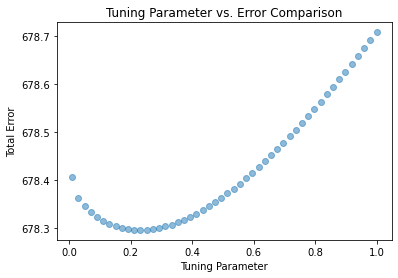

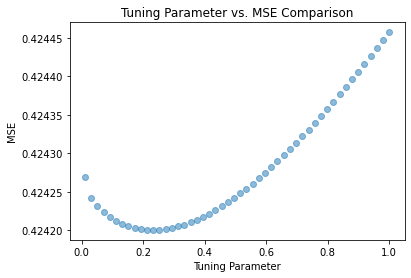

0.42420047585907955


In [183]:
# featurelist  = the list of list of features (independent variables) and 1 from B0 coefficient
# nocoeffeatures = list of list of just features (indpendent variables) and no B0 coefficient
# qualitylist = the list of strictly just quality of wine value
# alltgt = list of lists of features and final wine quality val

# scalefeat_withb0 = scaled features with b0 coefficient
# scalefeat_nob0 = scaled features without b0 coefficient added
# scalequality = the scaled quality scores of all the wine


from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

alphalist = np.linspace(0.01, 1, num=50)

X = np.array(nocoeffeatures)
y = np.array(qualitylist)
ridge1 = linear_model.RidgeCV(alphas=alphalist, store_cv_values=True)
ridge1.fit(X, y)
print(ridge1.alpha_)
print(ridge1.coef_)

error_list = [0]*50

for i in ridge1.cv_values_:
    for j in range(len(error_list)):
        error_list[j] += i[0][j]
        



x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

# computing mse error

for k in range(len(error_list)):
    error_list[k] = error_list[k] / 1599
    

x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. MSE Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('MSE')
plt.show()

print(min(error_list))


## Analysis
<b> With the new built-in RidgeCV function I used, and the fact that I used decimal increments of alpha values between 0 to 1 instead of 1 to 200, you can see that there is indeed a dip for the best tuning parameter that produce the lowest mean squared error, and it is 0.23224489.  Well, before we conclude it is the best tuning parameter, let's extrapolate this technique to a larger range, from 1 to 200, and see how the graphs play out. </b>

1.0
[[ 0.0134762  -1.10606693 -0.19832796  0.00754172 -1.34484932  0.00449295
  -0.00321945 -0.02068421 -0.43768992  0.81780861  0.29833937]]


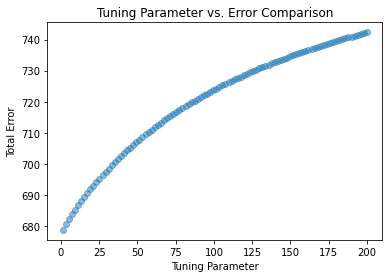

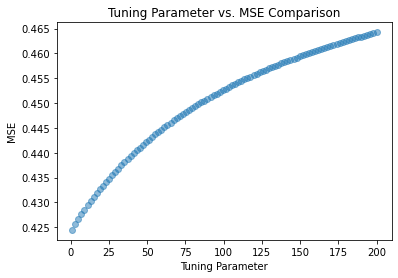

In [184]:
# featurelist  = the list of list of features (independent variables) and 1 from B0 coefficient
# nocoeffeatures = list of list of just features (indpendent variables) and no B0 coefficient
# qualitylist = the list of strictly just quality of wine value
# alltgt = list of lists of features and final wine quality val

# scalefeat_withb0 = scaled features with b0 coefficient
# scalefeat_nob0 = scaled features without b0 coefficient added
# scalequality = the scaled quality scores of all the wine


from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# 1 to 200 by increments of 2

alphalist = np.linspace(1, 200, num=100)

X = np.array(nocoeffeatures)
y = np.array(qualitylist)
ridge1 = linear_model.RidgeCV(alphas=alphalist, store_cv_values=True)
ridge1.fit(X, y)
print(ridge1.alpha_)
print(ridge1.coef_)

error_list = [0]*100

for i in ridge1.cv_values_:
    for j in range(len(error_list)):
        error_list[j] += i[0][j]
        



x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

# computing mse error

for k in range(len(error_list)):
    error_list[k] = error_list[k] / 1599
    

x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. MSE Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('MSE')
plt.show()


##  Analysis 
<b> Well, this looks familiar. It shows the exact same trend from when I did coded cross-validation manually, which means that 1) my coding is not incorrect and 2) the higher the parameter the less effective it is to reduce the MSE of the estimated parameters.  Which leads us to the final method, using normalization/standardization, which is also built in to this amazing RidgeCV function from sklearn! </b>

1.0
[[ 0.05423638 -0.24004068 -0.04369892  0.02864414 -0.1091773   0.0563639
  -0.13286872 -0.042314   -0.07869702  0.19228493  0.36395753]]


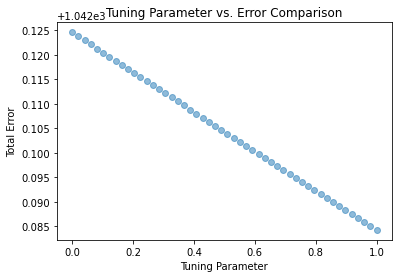

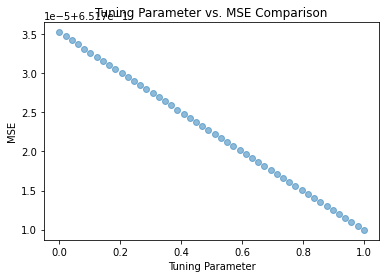

In [185]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# 1 to 200 by increments of 2

from sklearn.preprocessing import StandardScaler

# standardizing feature data

scaler1 = StandardScaler()
scaler1.fit(nocoeffeatures)
featurecopy = nocoeffeatures.copy()
rxmatrix = np.array(scaler1.transform(featurecopy))

# standardizing quality values

scaler2 = StandardScaler()
scaler2.fit(qualitylist)
qualitycopy = qualitylist.copy()
rymatrix = np.array(scaler2.transform(qualitycopy))
        
# 0 to 1 by increments of 0.02

alphalist = np.linspace(0.0001, 1, num=50)

ridgen = linear_model.RidgeCV(alphas=alphalist, store_cv_values=True)
ridgen.fit(rxmatrix, rymatrix)
print(ridgen.alpha_)
print(ridgen.coef_)

error_list = [0]*50

for i in ridgen.cv_values_:
    for j in range(len(error_list)):
        error_list[j] += i[0][j]
        

x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

# computing mse error

for k in range(len(error_list)):
    error_list[k] = error_list[k] / 1599
    

x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. MSE Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('MSE')
plt.show()





## Analysis
<b> The graph is interesting, as the slope seems to continually go downward as alpha increases without stopping.  This makes a little sense, since when we standardized the data before using our manually coded cross validation algorithm, the dip occurred around 50, which meant that the graph above can be the snippet of the trend from 0 to 1 as it heads toward a minimum later when we investigate tuning parameters from 1 to 200. </b>

65.32323232323232
[[ 0.064913   -0.22787596 -0.02446627  0.0329163  -0.1062228   0.04940442
  -0.12681011 -0.06266889 -0.06217932  0.18748929  0.33950988]]


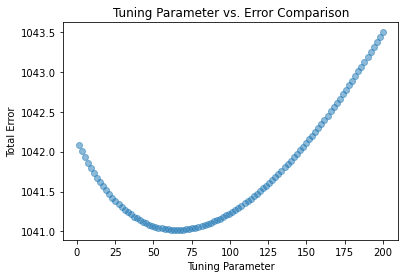

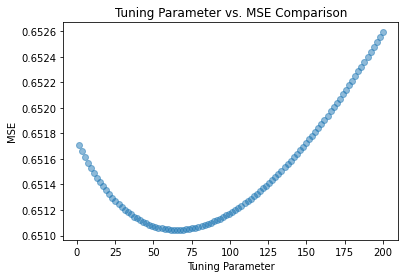

In [186]:
# featurelist  = the list of list of features (independent variables) and 1 from B0 coefficient
# nocoeffeatures = list of list of just features (indpendent variables) and no B0 coefficient
# qualitylist = the list of strictly just quality of wine value
# alltgt = list of lists of features and final wine quality val

# scalefeat_withb0 = scaled features with b0 coefficient
# scalefeat_nob0 = scaled features without b0 coefficient added
# scalequality = the scaled quality scores of all the wine



# now it is 1 to 200 by increments of 2
alphalist = np.linspace(1, 200, num=100)

ridgen = linear_model.RidgeCV(alphas=alphalist, store_cv_values=True)
ridgen.fit(rxmatrix, rymatrix)
print(ridgen.alpha_)
print(ridgen.coef_)

error_list = [0]*100

for i in ridgen.cv_values_:
    for j in range(len(error_list)):
        error_list[j] += i[0][j]
        

x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. Error Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('Total Error')
plt.show()

# computing mse error

for k in range(len(error_list)):
    error_list[k] = error_list[k] / 1599
    

x = alphalist
y = error_list
    

plt.scatter(x, y, alpha=0.5)
plt.title('Tuning Parameter vs. MSE Comparison')
plt.xlabel('Tuning Parameter')
plt.ylabel('MSE')
plt.show()




## Analysis
<b> Sure enough, this trend further shows that the manual coding I did for the leave k-out cross validation algorithm was not incorrect, as the trend continute from 1 to 200 to a minimum value of around 65, which, although not 54 as computed manually, is close enough to demonstrate the same trend in tuning parameter selection. Our next step is to use the best tuning parameter from both non-standardized and standardized forms of ridge regression to compute the total residual error on the qualitylist dataset, then compare. </b>

In [214]:
# ridge1 = nonstandardized model of ridge regression
# ridgen = standardized model of ridge regression

# featurelist  = the list of list of features (independent variables) and 1 from B0 coefficient
# nocoeffeatures = list of list of just features (indpendent variables) and no B0 coefficient
# qualitylist = the list of strictly just quality of wine value
# alltgt = list of lists of features and final wine quality val

# scalefeat_withb0 = scaled features with b0 coefficient
# scalefeat_nob0 = scaled features without b0 coefficient added
# scalequality = the scaled quality scores of all the wine

newx = np.array(nocoeffeatures)
newy = np.array(qualitylist)

error_ridge1 = 0


reg1 = linear_model.Ridge(alpha=ridge1.alpha_)
reg1.fit(newx, newy)
modcoeffs1 = np.concatenate((reg1.intercept_, reg1.coef_), axis=None)

print(ridge1.coef_)

# if ridge1.coef_ == reg1.coef_:
    # print(True)
# else:
    # print(False)

for x in range(len(new_data)):
    estimate = np.matmul(modcoeffs1, np.array(featurelist[x]))
    pointerror = (estimate - qualitylist[x])**2
    error_ridge1 += pointerror

print(error_ridge1)

newx = np.array(scalefeat_nob0)
newy = np.array(scalequality)

error_ridgen = 0

reg1 = linear_model.Ridge(alpha=ridgen.alpha_)
reg1.fit(newx, newy)
modcoeffs2 = np.concatenate((reg1.intercept_, reg1.coef_), axis=None)

for x in range(len(new_data)):
    estimate = np.matmul(modcoeffs2, np.array(scalefeat_withb0[x]))
    pointerror = ((qualitymean + estimate * qualitystd) - qualitylist[x])**2 # key step in rescaling back to original quality scale
    error_ridgen += pointerror

print(error_ridgen)
print(ridge1.coef_)
print(ridgen.coef_)

# write into excel spreadsheet

df1 = pd.DataFrame(modcoeffs1, index=["B0", "fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"], columns=["coefficients"])
df1.to_excel("Ridgeunnorm.xlsx")
df2 = pd.DataFrame(modcoeffs2, index=["B0", "fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"], columns=["coefficients"])
df2.to_excel("Ridgenorm.xlsx")


[[ 0.0134762  -1.10606693 -0.19832796  0.00754172 -1.34484932  0.00449295
  -0.00321945 -0.02068421 -0.43768992  0.81780861  0.29833937]]
[667.52774379]
[666.96490237]
[[ 0.0134762  -1.10606693 -0.19832796  0.00754172 -1.34484932  0.00449295
  -0.00321945 -0.02068421 -0.43768992  0.81780861  0.29833937]]
[[ 0.064913   -0.22787596 -0.02446627  0.0329163  -0.1062228   0.04940442
  -0.12681011 -0.06266889 -0.06217932  0.18748929  0.33950988]]


## Analysis (Conclusion of Ridge Regression)
<b> From extensive analysis by manually coding Leave k-out algorithm, to realizing the built in feature of RidgeCV, to finding new tuning parameter ranges, to selecting tuning parameters with the best MSE, and then finally comparing best tuning parameters through non-standardized and standardized methods of Ridge Regression, I have come to the conclusion that penalizing certain predictors may overall not lead to a significantly better linear model compared to OLS itself.  There are many reasons as to why this is.  From a conceptual standpoint, ridge regression generally works better if there are clear signs of collinearity between different predictors, and it is also also better if there are more predictor variables than there are observations.  OLS tends to overfit the data in the case that there are more predictors than there are observations.  However, in this case, there are around 1600 samples of wine, with only 12 predictors (including the B0 coefficient), which means that there is more than enough data points to prevent the OLS computed linear model to overfit dataset.  In addition, we can also safely assume that there is not a high correlation between the predictors since the reisdual error through extensive Ridge Regression has yielded little to no improvement of the total residual error (which in turn corresponds to MSE as well).  When we closely observe the parameters computed from Ridge Regression, we can see the non-standardized method penalized the density variable quite largely compared to OLS, which was also counteracted by a much smaller B0 coefficient.  In the standardized method of Ridge Regression, all the coefficients computed were scaled to be smaller and larger for some, since the standardization method increased the scale for some variables, for example chlorides, while it decreased the scale for others like total sulfur dioxide.  Overall, we see that the positive/negative relationships for each term from both OLS and Ridge Regression is the same, so the relationship between each independent variable to quality value are accurate. Next, we will look into Lasso regression.  Because I have done most of the heavy work in defining the procedures in cross-validation and tuning parameter selection, I will incorporate similar steps except use the built in LassoCV function. </b>

# Lasso Regression Computation

In [ ]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)
LassoCV()
# The estimator chose automatically its lambda:
lasso.alpha_
0.00375